In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py


In [2]:
data1 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c06000.h5",thTime=400,decim=1)

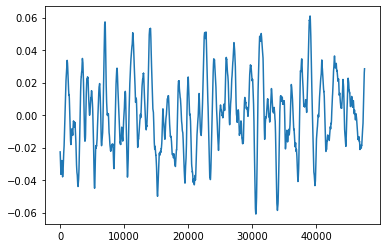

In [3]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,5])
plt.show()

In [9]:
data1.computeWallXFourier("A2")

In [14]:
testA=computeCttp(data1.wallXF["A2"][:,0],data1.wallXF["A2"][:,0],tMax=4000,conn=False)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


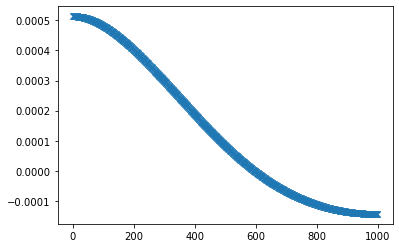

In [13]:
plt.plot(testA[:2500],'x')

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


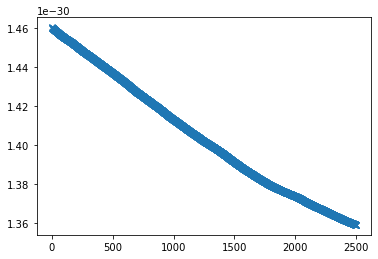

In [190]:
plt.plot(testV[:2500],'x')

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


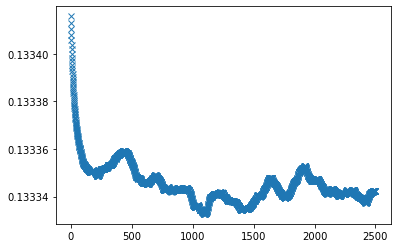

In [200]:
plt.plot(testPhi[:2500],'x')

In [181]:
def rhoOm(ω, dt, arr):
    res = 0
    
    for i in range(len(arr)):
        M = 1.0 / 1000.0
        t = i * dt
        res += arr[i] * np.exp(1j * ω * t - M * t)  
    return res
    

In [201]:
oms = np.arange(-0.03,0.03,1.0/(2000.0*dt))
resA=[]
resV=[]
resPhi=[]
for om in oms:
    resA.append(rhoOm(om,0.8,testA[:4000]))    
    resV.append(rhoOm(om,0.8,testV[:4000]))    
    resPhi.append(rhoOm(om,0.8,testPhi[:4000]))

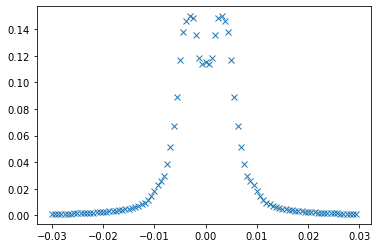

In [204]:
plt.plot(oms,np.real(resA),'x')
plt.savefig('jA1.pdf')
#plt.yscale('log')

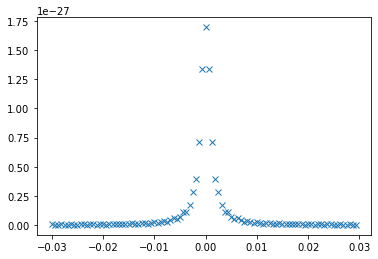

In [193]:
plt.plot(oms,np.real(resV),'x')

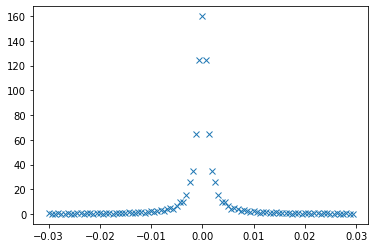

In [205]:
plt.plot(oms,np.real(resPhi),'x')
plt.savefig('phi0.pdf')